In [29]:
#Mounting Google drive to access datafile - only necessary if data sources are stored in Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#import pandas
import pandas as pd
print(pd.__version__)

#import matplotlib in order to produce visualizations
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#import seaborn in order to produce visualizations beyond standard matplotlib plots
import seaborn as sns

#import numpy for use in analyzing unique values in data, along with other standard numpy functions
import numpy as np

#import sklearn functions for use in developing machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#import scipy function for chi-squared analysis
from scipy.stats import chi2_contingency

#import LinearRegression from sklearn to perform regression analysis
from sklearn.linear_model import LinearRegression

#import Dummy Classifier to analyze and compare performance of model
from sklearn.dummy import DummyClassifier

#import sklearn's plot_confusion_matrix to analyze performance of model
from sklearn.metrics import plot_confusion_matrix

1.3.5


In [31]:
ownr_df = pd.read_csv("/content/drive/Shared drives/CAPSTONE/CSV_DATA/DAP_2020_HLES_dog_owner_v1.1.csv")
envr_df = pd.read_csv("/content/drive/Shared drives/CAPSTONE/CSV_DATA/DAP_2020_ENVIRONMENT_v1.1.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (119,121,123,125,127,136,167,195,241,242,243,244,245,246,247,248,256,376,520) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Owner Income Analysis**
The following cells analyze the potential for a relationship between owner income and the incidence of reported health conditions in dogs.

---



In [32]:
ownr_df_conditions = ownr_df[ownr_df['od_annual_income_range_usd'] != 98]

print(len(ownr_df))
print(len(ownr_df[ownr_df['od_annual_income_range_usd'] == 98]))
print(len(ownr_df_conditions))

income_and_conditions = ownr_df_conditions[['od_annual_income_range_usd','hs_health_conditions_cancer', 'hs_health_conditions_cardiac', 'hs_health_conditions_ear', 'hs_health_conditions_endocrine', 'hs_health_conditions_eye', 'hs_health_conditions_gastrointestinal', 'hs_health_conditions_hematologic', 'hs_health_conditions_immune', 'hs_health_conditions_infectious_disease', 'hs_health_conditions_kidney', 'hs_health_conditions_liver', 'hs_health_conditions_neurological', 'hs_health_conditions_oral', 'hs_health_conditions_orthopedic', 'hs_health_conditions_other', 'hs_health_conditions_reproductive', 'hs_health_conditions_respiratory', 'hs_health_conditions_skin', 'hs_health_conditions_toxin_consumption', 'hs_health_conditions_trauma']]

cancer_non_congenital = income_and_conditions[income_and_conditions['hs_health_conditions_cancer'] == 2]

income_and_conditions_corr = income_and_conditions.corr().sort_values(by=['od_annual_income_range_usd'], ascending=False)
income_and_conditions_corr['od_annual_income_range_usd']

27541
3357
24184


od_annual_income_range_usd                 1.000000
hs_health_conditions_infectious_disease    0.028100
hs_health_conditions_toxin_consumption     0.018344
hs_health_conditions_immune                0.013481
hs_health_conditions_cancer                0.009365
hs_health_conditions_orthopedic            0.007557
hs_health_conditions_reproductive          0.007129
hs_health_conditions_kidney                0.002786
hs_health_conditions_hematologic           0.002741
hs_health_conditions_ear                   0.001344
hs_health_conditions_liver                 0.001307
hs_health_conditions_neurological         -0.000773
hs_health_conditions_skin                 -0.001408
hs_health_conditions_gastrointestinal     -0.002281
hs_health_conditions_trauma               -0.004755
hs_health_conditions_respiratory          -0.005581
hs_health_conditions_cardiac              -0.009293
hs_health_conditions_other                -0.011783
hs_health_conditions_eye                  -0.011863
hs_health_co

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '<$20k'),
 Text(0, 0, '$20-39k'),
 Text(0, 0, '$40-59k'),
 Text(0, 0, '$60-79k'),
 Text(0, 0, '$80-99k'),
 Text(0, 0, '$100-119k'),
 Text(0, 0, '$120-139k'),
 Text(0, 0, '$140-159k'),
 Text(0, 0, '$160-179k'),
 Text(0, 0, '$180k+')]

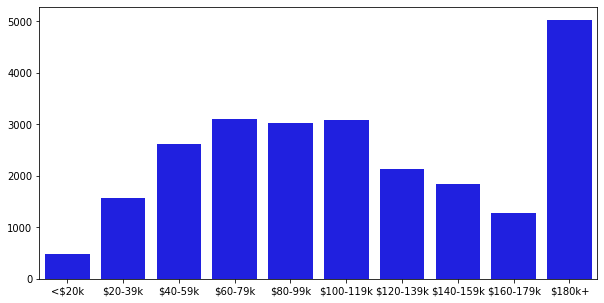

In [33]:


plt.rcParams["figure.figsize"] = (10,5)

val, cnt = np.unique(ownr_df_conditions['od_annual_income_range_usd'], return_counts=True)
income_hist = sns.barplot(val, cnt, color="b")
income_hist.set_xticklabels(['<$20k', '$20-39k', '$40-59k', '$60-79k', '$80-99k', '$100-119k','$120-139k', '$140-159k', '$160-179k', '$180k+'])

In [34]:
columns=[]
coefficients = []
for column in income_and_conditions.columns:
  if column != 'od_annual_income_range_usd':
    lin_reg_df = income_and_conditions[['od_annual_income_range_usd',column]].dropna()
    X = lin_reg_df[['od_annual_income_range_usd']]
    y = lin_reg_df[column]
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X, y)
    columns.append(column)
    coefficients.append(lin_reg_model.coef_[0])

Coef_df = pd.DataFrame({'Variable':columns,'Coefficient':coefficients})
Coef_df

,Variable,Coefficient
0,hs_health_conditions_cancer,0.001684
1,hs_health_conditions_cardiac,-0.001704
2,hs_health_conditions_ear,0.000334
3,hs_health_conditions_endocrine,-0.001959
4,hs_health_conditions_eye,-0.003006
5,hs_health_conditions_gastrointestinal,-0.000590
6,hs_health_conditions_hematologic,0.000149
7,hs_health_conditions_immune,0.000893
8,hs_health_conditions_infectious_disease,0.009182
9,hs_health_conditions_kidney,0.000551


(-0.05, 0.05)

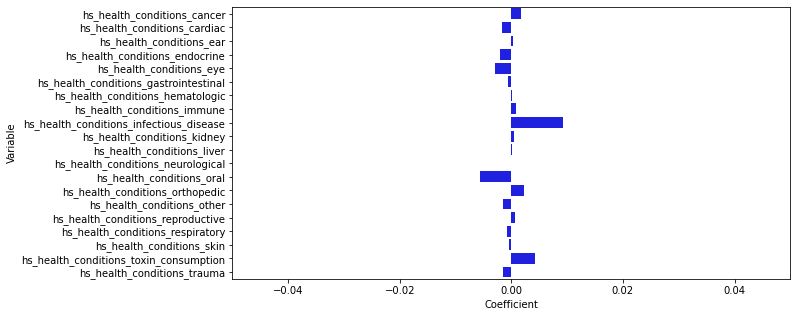

In [35]:
income_and_health_lingreg_df = sns.barplot(x="Coefficient", y="Variable", data=Coef_df,color="b")
plt.xlim(-.05, .05)

In [36]:
income_and_cancer = ownr_df[['od_annual_income_range_usd','hs_health_conditions_cancer']]
income_and_cancer = income_and_cancer[income_and_cancer['od_annual_income_range_usd'] != 98]

income_and_cancer_counts = pd.crosstab(income_and_cancer['od_annual_income_range_usd'], income_and_cancer['hs_health_conditions_cancer'])

print("OVERALL COUNTS ACROSS INCOME GROUPS:")
print(income_and_cancer_counts)

print("NORMALIZED TABLE ACROSS INCOME GROUPS:")
print(pd.crosstab(income_and_cancer['od_annual_income_range_usd'], income_and_cancer['hs_health_conditions_cancer'], normalize="index"))

stat, p, dof, expected = chi2_contingency(income_and_cancer_counts)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

OVERALL COUNTS ACROSS INCOME GROUPS:
hs_health_conditions_cancer     0    2
od_annual_income_range_usd            
1                             452   30
2                            1487   85
3                            2479  145
4                            2926  186
5                            2816  214
6                            2877  209
7                            1992  137
8                            1729  115
9                            1187   90
10                           4710  318
NORMALIZED TABLE ACROSS INCOME GROUPS:
hs_health_conditions_cancer         0         2
od_annual_income_range_usd                     
1                            0.937759  0.062241
2                            0.945929  0.054071
3                            0.944741  0.055259
4                            0.940231  0.059769
5                            0.929373  0.070627
6                            0.932275  0.067725
7                            0.935651  0.064349
8                       

hs_health_conditions_infectious_disease     0     2
od_annual_income_range_usd                         
1                                         349   133
2                                        1156   416
3                                        1966   658
4                                        2319   793
5                                        2271   759
6                                        2301   785
7                                        1529   600
8                                        1377   467
9                                         917   360
10                                       3554  1474
p value is 3.838734390301141e-05
----------------
hs_health_conditions_infectious_disease         0         2
od_annual_income_range_usd                                 
1                                        0.724066  0.275934
2                                        0.735369  0.264631
3                                        0.749238  0.250762
4                         

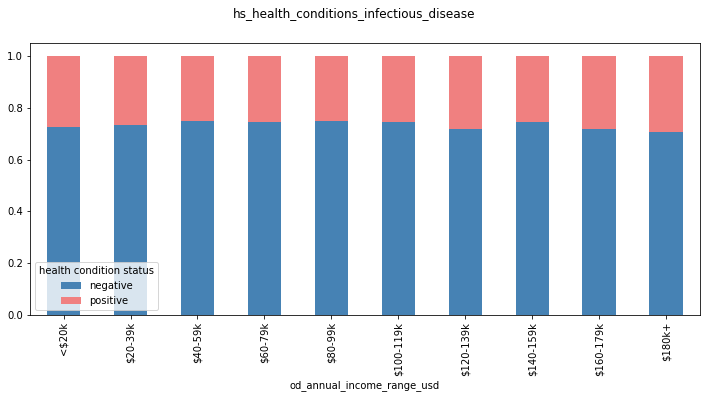

----------------
hs_health_conditions_toxin_consumption     0    2
od_annual_income_range_usd                       
1                                        419   63
2                                       1410  162
3                                       2327  297
4                                       2788  324
5                                       2723  307
6                                       2733  353
7                                       1893  236
8                                       1630  214
9                                       1120  157
10                                      4403  625
p value is 0.040182690218329105
----------------
hs_health_conditions_toxin_consumption         0         2
od_annual_income_range_usd                                
1                                       0.869295  0.130705
2                                       0.896947  0.103053
3                                       0.886814  0.113186
4                                      

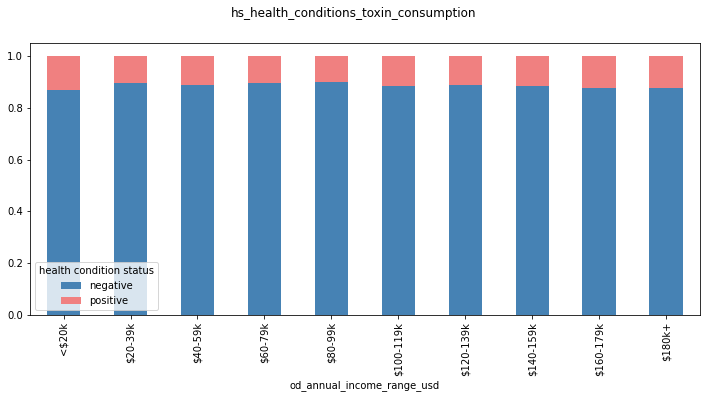

----------------


In [37]:
for column in income_and_conditions.columns:
  if column != 'od_annual_income_range_usd':
    chi_df = pd.crosstab(income_and_conditions['od_annual_income_range_usd'], income_and_conditions[column])
    stat, p, dof, expected = chi2_contingency(chi_df)
    if p < .05:
      print(chi_df)
      print("p value is",p)
      print("----------------")
      crosstab = pd.crosstab(income_and_conditions['od_annual_income_range_usd'], income_and_conditions[column], normalize="index")
      print(crosstab)
      plt.rcParams["figure.figsize"] = (12,5)
      plot = crosstab.plot(kind='bar', stacked=True, color=['steelblue','lightcoral'])
      plot.set_xticklabels(['<$20k', '$20-39k', '$40-59k', '$60-79k', '$80-99k', '$100-119k','$120-139k', '$140-159k', '$160-179k', '$180k+'])
      plt.legend(title = 'health condition status', loc='lower left', labels=['negative', 'positive'])
      plt.suptitle(column)
      plt.show(plot)
      print("----------------")
      

27543


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Median Income Quartiles')

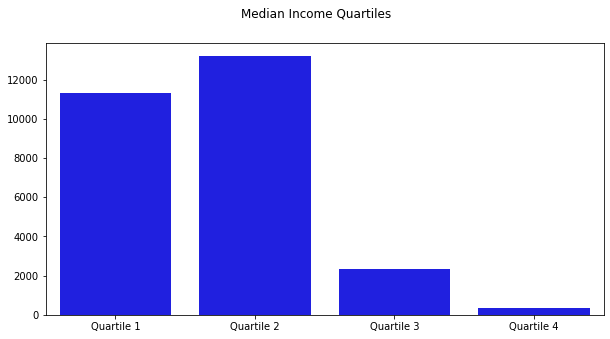

In [38]:
envir_and_owner = envr_df.set_index('dog_id').join(ownr_df.set_index('dog_id')).reset_index()

envir_and_owner = envir_and_owner.drop_duplicates(subset=['dog_id'])

cv_median_income_and_conditions = envir_and_owner[['cv_median_income', 'hs_health_conditions_cancer', 'hs_health_conditions_cardiac', 'hs_health_conditions_ear', 'hs_health_conditions_endocrine', 'hs_health_conditions_eye', 'hs_health_conditions_gastrointestinal', 'hs_health_conditions_hematologic', 'hs_health_conditions_immune', 'hs_health_conditions_infectious_disease', 'hs_health_conditions_kidney', 'hs_health_conditions_liver', 'hs_health_conditions_neurological', 'hs_health_conditions_oral', 'hs_health_conditions_orthopedic', 'hs_health_conditions_other', 'hs_health_conditions_reproductive', 'hs_health_conditions_respiratory', 'hs_health_conditions_skin', 'hs_health_conditions_toxin_consumption', 'hs_health_conditions_trauma']]

print(len(cv_median_income_and_conditions))

cv_median_income_and_conditions['cv_median_income_quartile'] = pd.cut(cv_median_income_and_conditions['cv_median_income'], 4, labels=[1,2,3,4])

plt.rcParams["figure.figsize"] = (10,5)

val, cnt = np.unique(cv_median_income_and_conditions['cv_median_income_quartile'], return_counts=True)
cv_median_income_hist = sns.barplot(val, cnt, color="b")
cv_median_income_hist.set_xticklabels(['Quartile 1','Quartile 2', 'Quartile 3','Quartile 4'])
plt.suptitle('Median Income Quartiles')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


hs_health_conditions_cancer    0.0  2.0
cv_median_income_quartile              
Quartile_1                   13159  789
Quartile_2                   13103  844
Quartile_3                   13033  930
Quartile_4                   12971  964
p value is 3.663739165218873e-05
crosstab: hs_health_conditions_cancer       0.0       2.0
cv_median_income_quartile                      
Quartile_1                   0.943433  0.056567
Quartile_2                   0.939485  0.060515
Quartile_3                   0.933395  0.066605
Quartile_4                   0.930822  0.069178


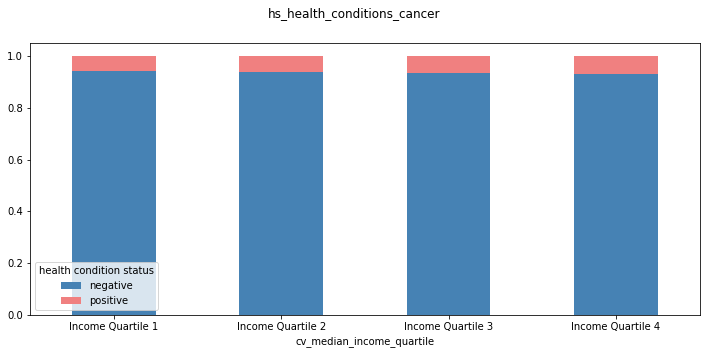

----------------
hs_health_conditions_infectious_disease    0.0   2.0
cv_median_income_quartile                           
Quartile_1                               10461  3487
Quartile_2                               10208  3739
Quartile_3                               10220  3743
Quartile_4                                9940  3995
p value is 2.3372467317133986e-10
crosstab: hs_health_conditions_infectious_disease       0.0       2.0
cv_median_income_quartile                                  
Quartile_1                               0.750000  0.250000
Quartile_2                               0.731914  0.268086
Quartile_3                               0.731934  0.268066
Quartile_4                               0.713312  0.286688


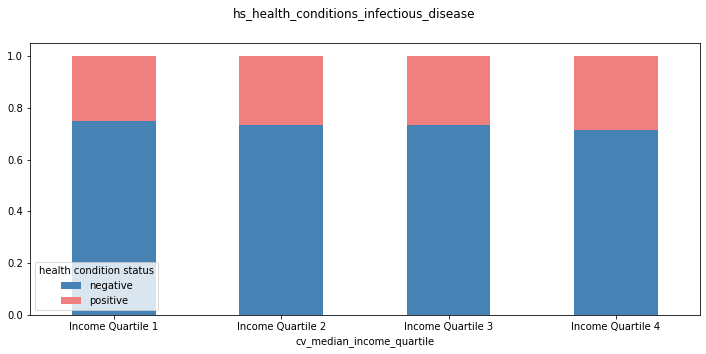

----------------
hs_health_conditions_oral    0.0   2.0
cv_median_income_quartile             
Quartile_1                 10205  3698
Quartile_2                 10025  3882
Quartile_3                 10096  3813
Quartile_4                  9943  3947
p value is 0.00576405523407617
crosstab: hs_health_conditions_oral       0.0       2.0
cv_median_income_quartile                    
Quartile_1                 0.734014  0.265986
Quartile_2                 0.720860  0.279140
Quartile_3                 0.725861  0.274139
Quartile_4                 0.715839  0.284161


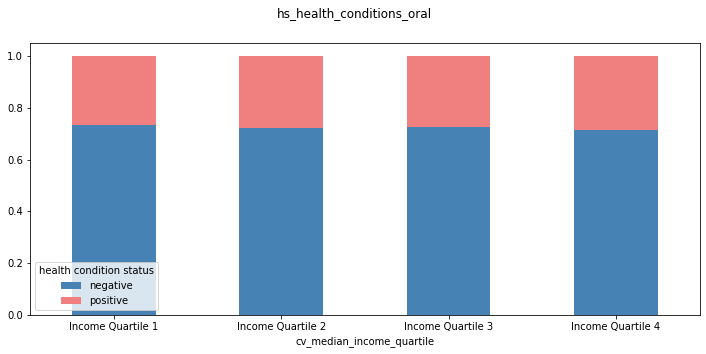

----------------
hs_health_conditions_toxin_consumption    0.0   2.0
cv_median_income_quartile                          
Quartile_1                              12414  1534
Quartile_2                              12428  1519
Quartile_3                              12315  1648
Quartile_4                              12263  1672
p value is 0.004769425591287071
crosstab: hs_health_conditions_toxin_consumption       0.0       2.0
cv_median_income_quartile                                 
Quartile_1                              0.890020  0.109980
Quartile_2                              0.891088  0.108912
Quartile_3                              0.881974  0.118026
Quartile_4                              0.880014  0.119986


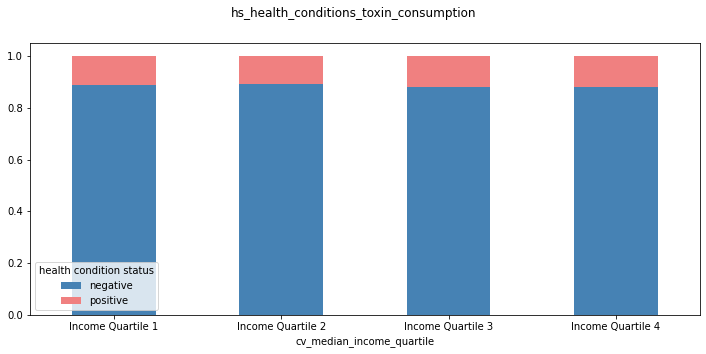

----------------


In [39]:
envir_and_owner = envr_df.set_index('dog_id').join(ownr_df.set_index('dog_id')).reset_index()
cv_median_income_and_conditions = envir_and_owner[['cv_median_income', 'hs_health_conditions_cancer', 'hs_health_conditions_cardiac', 'hs_health_conditions_ear', 'hs_health_conditions_endocrine', 'hs_health_conditions_eye', 'hs_health_conditions_gastrointestinal', 'hs_health_conditions_hematologic', 'hs_health_conditions_immune', 'hs_health_conditions_infectious_disease', 'hs_health_conditions_kidney', 'hs_health_conditions_liver', 'hs_health_conditions_neurological', 'hs_health_conditions_oral', 'hs_health_conditions_orthopedic', 'hs_health_conditions_other', 'hs_health_conditions_reproductive', 'hs_health_conditions_respiratory', 'hs_health_conditions_skin', 'hs_health_conditions_toxin_consumption', 'hs_health_conditions_trauma']]

cv_median_income_and_conditions['cv_median_income_quartile'] = pd.qcut(cv_median_income_and_conditions['cv_median_income'], 4, labels=['Quartile_1','Quartile_2','Quartile_3','Quartile_4'])

for column in cv_median_income_and_conditions.columns:
  if column != 'cv_median_income_quartile' and column != 'cv_median_income':
    compare_df = cv_median_income_and_conditions[['cv_median_income', column]]
    compare_df = cv_median_income_and_conditions[cv_median_income_and_conditions[column].isin([0.0,2.0])]
    chi_df = pd.crosstab(compare_df['cv_median_income_quartile'], compare_df[column])
    stat, p, dof, expected = chi2_contingency(chi_df)
    if p < .01:
      print(chi_df)
      print("p value is",p)
      crosstab = pd.crosstab(compare_df['cv_median_income_quartile'], compare_df[column], normalize="index")
      print("crosstab:", crosstab)
      plt.rcParams["figure.figsize"] = (12,5)
      plot = crosstab.plot(kind='bar', stacked=True, color=['steelblue','lightcoral'])
      plot.set_xticklabels(['Income Quartile 1', 'Income Quartile 2', 'Income Quartile 3', 'Income Quartile 4'], rotation=0)
      plt.legend(title = 'health condition status', loc='lower left', labels=['negative', 'positive'])
      plt.suptitle(column)
      plt.show(plot)
      print("----------------")

In [40]:
envir_and_owner = envr_df.set_index('dog_id').join(ownr_df.set_index('dog_id')).reset_index()
cv_median_income_and_conditions = envir_and_owner[['cv_median_income', 'hs_health_conditions_cancer', 'hs_health_conditions_cardiac', 'hs_health_conditions_ear', 'hs_health_conditions_endocrine', 'hs_health_conditions_eye', 'hs_health_conditions_gastrointestinal', 'hs_health_conditions_hematologic', 'hs_health_conditions_immune', 'hs_health_conditions_infectious_disease', 'hs_health_conditions_kidney', 'hs_health_conditions_liver', 'hs_health_conditions_neurological', 'hs_health_conditions_oral', 'hs_health_conditions_orthopedic', 'hs_health_conditions_other', 'hs_health_conditions_reproductive', 'hs_health_conditions_respiratory', 'hs_health_conditions_skin', 'hs_health_conditions_toxin_consumption', 'hs_health_conditions_trauma']]

captured_corrs = []
for column in cv_median_income_and_conditions.columns:
  if column != 'cv_median_income':
    regression_df = cv_median_income_and_conditions[['cv_median_income',column]].dropna()
    X = regression_df[['cv_median_income']]
    y = regression_df[[column]]
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X, y)
    if abs(lin_reg_model.coef_[0][0]) > .1:      
      captured_corrs.append(column, lin_reg_model.coef_[0][0])

if len(captured_corrs) > 0:
  print(captured_corrs)
else:
  print("no significant correlations found")

no significant correlations found


In [41]:
envir_and_owner = envr_df.set_index('dog_id').join(ownr_df.set_index('dog_id')).reset_index()
cv_median_income_and_conditions = envir_and_owner[['cv_median_income', 'hs_health_conditions_cancer', 'hs_health_conditions_cardiac', 'hs_health_conditions_ear', 'hs_health_conditions_endocrine', 'hs_health_conditions_eye', 'hs_health_conditions_gastrointestinal', 'hs_health_conditions_hematologic', 'hs_health_conditions_immune', 'hs_health_conditions_infectious_disease', 'hs_health_conditions_kidney', 'hs_health_conditions_liver', 'hs_health_conditions_neurological', 'hs_health_conditions_oral', 'hs_health_conditions_orthopedic', 'hs_health_conditions_other', 'hs_health_conditions_reproductive', 'hs_health_conditions_respiratory', 'hs_health_conditions_skin', 'hs_health_conditions_toxin_consumption', 'hs_health_conditions_trauma']]

columns=[]
coefficients = []
for column in cv_median_income_and_conditions.columns:
  if column != 'cv_median_income':
    lin_reg_df = cv_median_income_and_conditions[['cv_median_income',column]].dropna()
    X = lin_reg_df[['cv_median_income']]
    y = lin_reg_df[column]
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X, y)
    columns.append(column)
    coefficients.append(round(lin_reg_model.coef_[0],7))

Coef_df = pd.DataFrame({'Variable':columns,'Coefficient':coefficients})
Coef_df

,Variable,Coefficient
0,hs_health_conditions_cancer,2.000000e-07
1,hs_health_conditions_cardiac,2.000000e-07
2,hs_health_conditions_ear,2.000000e-07
3,hs_health_conditions_endocrine,-1.000000e-07
4,hs_health_conditions_eye,1.000000e-07
5,hs_health_conditions_gastrointestinal,1.000000e-07
6,hs_health_conditions_hematologic,0.000000e+00
7,hs_health_conditions_immune,-0.000000e+00
8,hs_health_conditions_infectious_disease,7.000000e-07
9,hs_health_conditions_kidney,1.000000e-07


# Source of Acquisition Analysis
The following cells analyze the potential for a relationship between how a dog was acquired (e.g., adoption, breeder, pet shop, etc.) and the incidence of health conditions reported in dogs.

---

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Acquired Source')

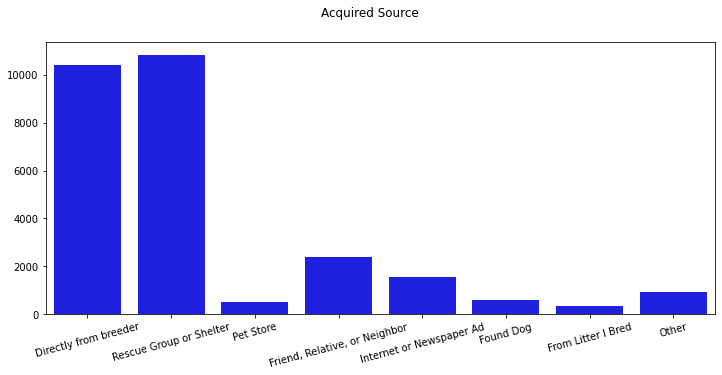

In [42]:
val, cnt = np.unique(ownr_df['dd_acquired_source'], return_counts=True)
acquired_source_hist = sns.barplot(val, cnt, color="b")
acquired_source_hist.set_xticklabels(['Directly from breeder', 'Rescue Group or Shelter', 'Pet Store', 'Friend, Relative, or Neighbor', 'Internet or Newspaper Ad', 'Found Dog','From Litter I Bred', 'Other'], rotation=15)
plt.suptitle('Acquired Source')

variable is  hs_health_conditions_cancer
hs_health_conditions_cancer      0    2
dd_acquired_source                     
1                             9869  537
2                            10069  735
hs_health_conditions_cancer         0         2
dd_acquired_source                             
1                            0.948395  0.051605
2                            0.931970  0.068030
p value is 5.50854878622955e-07


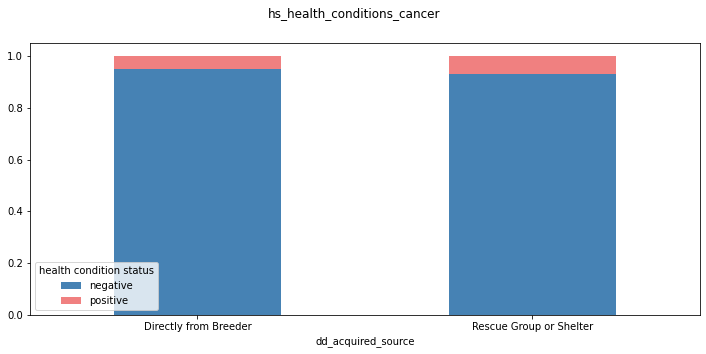

----------------
variable is  hs_health_conditions_cardiac
hs_health_conditions_cardiac      0    2
dd_acquired_source                      
1                              9855  447
2                             10159  555
hs_health_conditions_cardiac         0         2
dd_acquired_source                              
1                             0.956610  0.043390
2                             0.948199  0.051801
p value is 0.00467689544547972


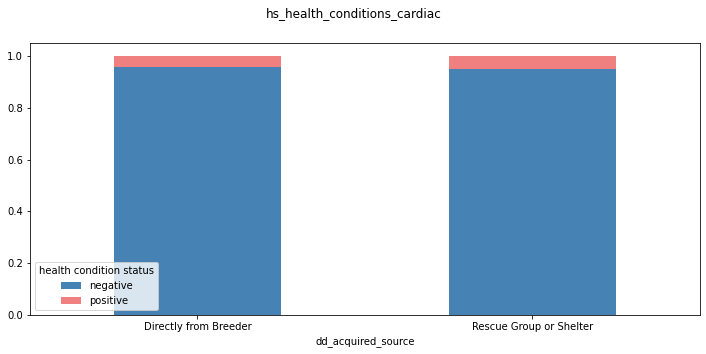

----------------
variable is  hs_health_conditions_ear
hs_health_conditions_ear     0     2
dd_acquired_source                  
1                         9019  1368
2                         9516  1250
hs_health_conditions_ear         0         2
dd_acquired_source                          
1                         0.868297  0.131703
2                         0.883894  0.116106
p value is 0.0006199701393019977


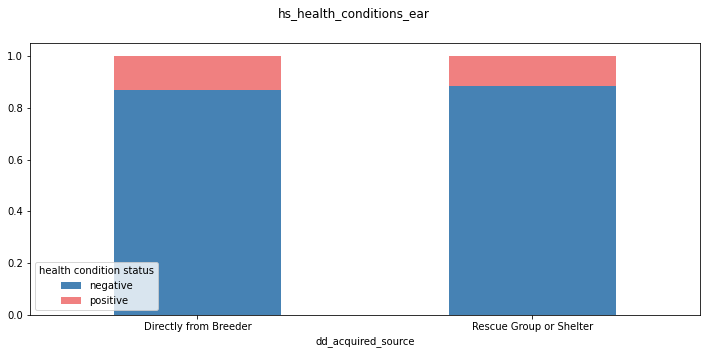

----------------
variable is  hs_health_conditions_hematologic
hs_health_conditions_hematologic      0   2
dd_acquired_source                         
1                                 10360  43
2                                 10732  70
hs_health_conditions_hematologic         0         2
dd_acquired_source                                  
1                                 0.995867  0.004133
2                                 0.993520  0.006480
p value is 0.02430579354085241


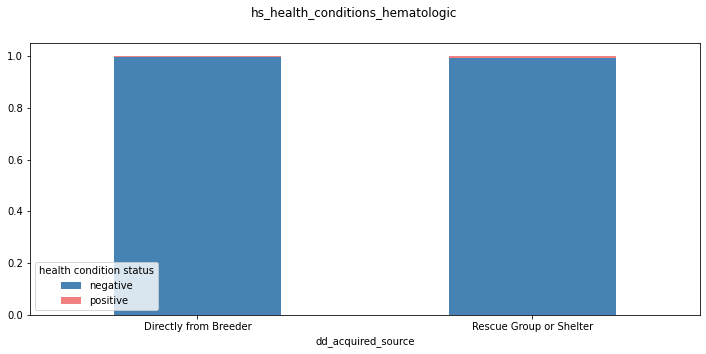

----------------
variable is  hs_health_conditions_infectious_disease
hs_health_conditions_infectious_disease     0     2
dd_acquired_source                                 
1                                        7808  2598
2                                        7510  3294
hs_health_conditions_infectious_disease         0         2
dd_acquired_source                                         
1                                        0.750336  0.249664
2                                        0.695113  0.304887
p value is 3.21956889645415e-19


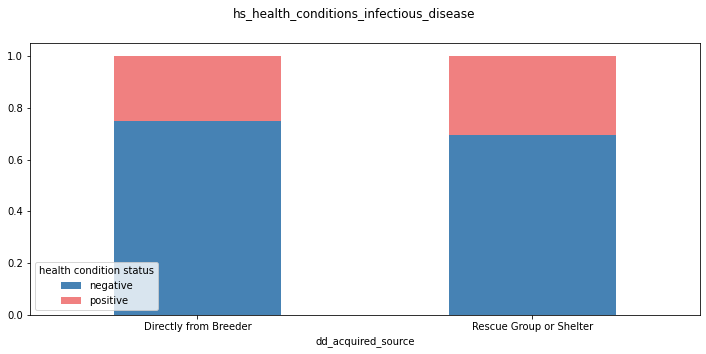

----------------
variable is  hs_health_conditions_kidney
hs_health_conditions_kidney     0    2
dd_acquired_source                    
1                            9673  717
2                            9925  863
hs_health_conditions_kidney         0         2
dd_acquired_source                             
1                            0.930991  0.069009
2                            0.920004  0.079996
p value is 0.002560816378543001


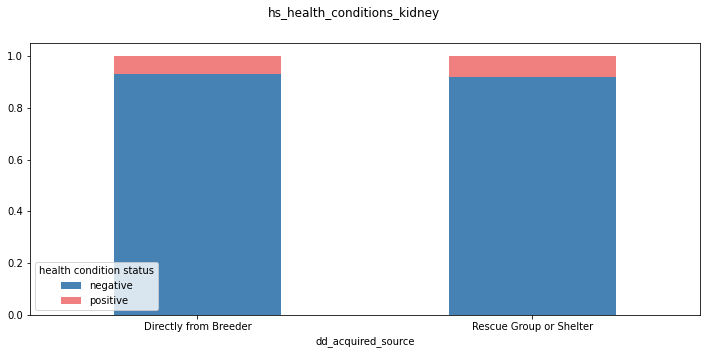

----------------
variable is  hs_health_conditions_oral
hs_health_conditions_oral     0     2
dd_acquired_source                   
1                          7904  2459
2                          7540  3244
hs_health_conditions_oral         0         2
dd_acquired_source                           
1                          0.762713  0.237287
2                          0.699184  0.300816
p value is 2.7272230377405537e-25


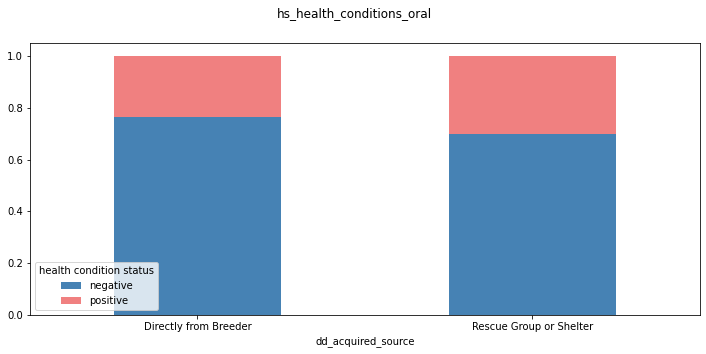

----------------
variable is  hs_health_conditions_orthopedic
hs_health_conditions_orthopedic     0     2
dd_acquired_source                         
1                                8676  1658
2                                8530  2151
hs_health_conditions_orthopedic         0         2
dd_acquired_source                                 
1                                0.839559  0.160441
2                                0.798614  0.201386
p value is 1.5302004216474253e-14


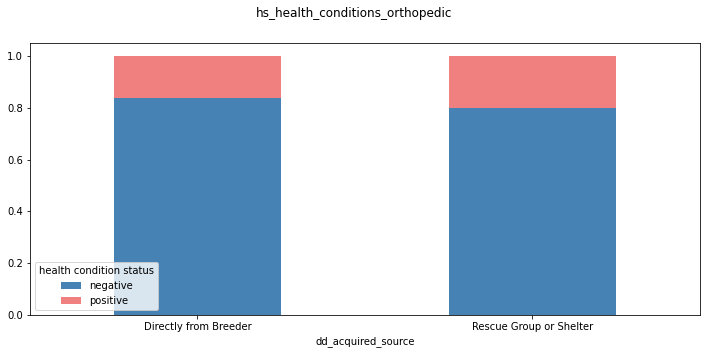

----------------
variable is  hs_health_conditions_reproductive
hs_health_conditions_reproductive      0    2
dd_acquired_source                           
1                                  10066  261
2                                  10673  120
hs_health_conditions_reproductive         0         2
dd_acquired_source                                   
1                                  0.974726  0.025274
2                                  0.988882  0.011118
p value is 1.6608259860881737e-14


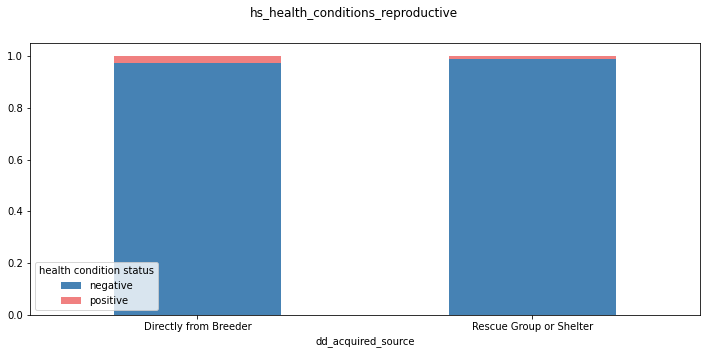

----------------
variable is  hs_health_conditions_skin
hs_health_conditions_skin     0     2
dd_acquired_source                   
1                          7615  2740
2                          7510  3273
hs_health_conditions_skin         0         2
dd_acquired_source                           
1                          0.735394  0.264606
2                          0.696467  0.303533
p value is 3.9574606256782353e-10


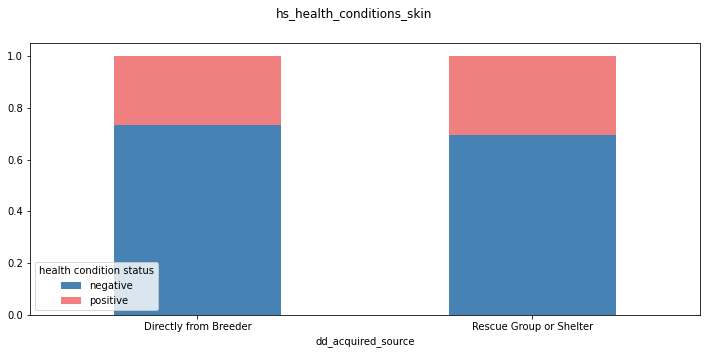

----------------
variable is  hs_health_conditions_trauma
hs_health_conditions_trauma     0     2
dd_acquired_source                     
1                            7943  2463
2                            7469  3335
hs_health_conditions_trauma         0         2
dd_acquired_source                             
1                            0.763310  0.236690
2                            0.691318  0.308682
p value is 7.503503388904056e-32


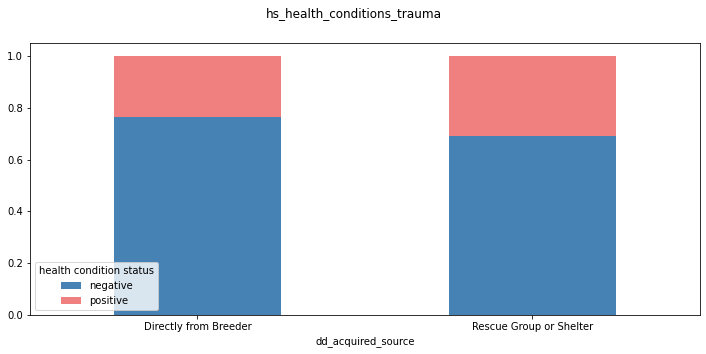

----------------


In [43]:
adopt_and_outcomes = ownr_df[['dd_acquired_source','hs_health_conditions_cancer', 'hs_health_conditions_cardiac', 'hs_health_conditions_ear', 'hs_health_conditions_endocrine', 'hs_health_conditions_eye', 'hs_health_conditions_gastrointestinal', 'hs_health_conditions_hematologic', 'hs_health_conditions_immune', 'hs_health_conditions_infectious_disease', 'hs_health_conditions_kidney', 'hs_health_conditions_liver', 'hs_health_conditions_neurological', 'hs_health_conditions_oral', 'hs_health_conditions_orthopedic', 'hs_health_conditions_other', 'hs_health_conditions_reproductive', 'hs_health_conditions_respiratory', 'hs_health_conditions_skin', 'hs_health_conditions_toxin_consumption', 'hs_health_conditions_trauma']]

adopt_and_outcomes = adopt_and_outcomes[adopt_and_outcomes['dd_acquired_source'].isin([1,2])]

for column in adopt_and_outcomes.columns:
  if column != 'dd_acquired_source':
    compare_df = adopt_and_outcomes[adopt_and_outcomes[column].isin([0,2])]
    chi_df = pd.crosstab(compare_df['dd_acquired_source'], compare_df[column])
    stat, p, dof, expected = chi2_contingency(chi_df)
    if p < .05:
      print("variable is ",column)
      print(chi_df)
      normalized_crosstab = pd.crosstab(compare_df['dd_acquired_source'], compare_df[column], normalize="index")
      print(normalized_crosstab)      
      print("p value is",p)
      plt.rcParams["figure.figsize"] = (12,5)
      plot = normalized_crosstab.plot(kind='bar', stacked=True, color=['steelblue','lightcoral'])
      plot.set_xticklabels(['Directly from Breeder', 'Rescue Group or Shelter'], rotation=0)
      plt.legend(title = 'health condition status', loc='lower left', labels=['negative', 'positive'])
      plt.suptitle(column)
      plt.show(plot)
      print("----------------")

# BELOW ARE THE VALUES CORRESPONDING TO EACH GROUP IN THE DATA SET
# 1 Directly from a breeder 
# 2 Rescue group or shelter 
# 3 Pet store 
# 4 Friend, relative, or neighbor
# 5 Via the internet or newspaper ad 
# 6 Found 
# 7 From litter I bred 
# 98 Other


In [44]:
captured_corrs = []
for column in adopt_and_outcomes.columns:
  if column != 'dd_acquired_source':
    regression_df = adopt_and_outcomes[['dd_acquired_source',column]].dropna()
    X = regression_df[['dd_acquired_source']]
    y = regression_df[[column]]
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X, y)
    if abs(lin_reg_model.coef_[0][0]) > .1:
      captured_corrs.append((column, lin_reg_model.coef_[0][0]))

if len(captured_corrs) > 0:
  print(captured_corrs)
else:
  print("no significant correlations found")

[('hs_health_conditions_infectious_disease', 0.11044684655272871), ('hs_health_conditions_oral', 0.12321274222864148), ('hs_health_conditions_trauma', 0.14398319740206295)]


In [45]:
# TEST FOR VARIABLES MOST CORRELATED WITH DD_ACQUIRED_SOURCE
source_test_df = ownr_df[ownr_df['dd_acquired_source'].isin([1,2])]
source_test_df = source_test_df.filter(like='dd_', axis=1)
source_test_df_corr = source_test_df.corr().sort_values(by=['dd_acquired_source'], key=abs, ascending=False)
source_test_df_corr = source_test_df_corr[['dd_acquired_source']]
source_test_df_corr.index.name = 'variable'
source_test_df_corr.reset_index(inplace=True)
source_test_df_corr[1:11]

,variable,dd_acquired_source
1,dd_alternate_recent_residence5_weeks,-0.666667
2,dd_breed_pure_or_mixed,0.629815
3,dd_has_sired_litters,0.549460
4,dd_estrous_cycle_count,0.549174
5,dd_age_basis,0.541669
6,dd_litter_count,0.491114
7,dd_estrous_cycle_experienced_before_spayed,0.469187
8,dd_spay_method,0.398854
9,dd_alternate_recent_residence3_weeks,0.323456
10,dd_has_been_pregnant,0.312568


hs_health_conditions_infectious_disease
-----Regression Analysis-----
0 dd_alternate_recent_residence5_weeks  -  -1.0
1 dd_alternate_recent_residence4_weeks  -  -0.34641016151377557
2 dd_activities_field_trials  -  0.17647779910590297
3 dd_activities_breeding  -  0.0974191493996176
4 dd_weight_range_expected_adult  -  0.06742199962523868
--------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

dd_alternate_recent_residence5_weeks = 0.0036002458999416626
dd_alternate_recent_residence4_weeks = 0.002871250254683521
dd_activities_field_trials = 0.03791882245475886
dd_activities_breeding = 0.04924800315959143
dd_weight_range_expected_adult = 0.08163367853514618
dd_acquired_source = 0.07741309956289204
dd_breed_pure_or_mixed = 0.07505723493213581
dd_has_sired_litters = 0.02298781450411346
dd_estrous_cycle_count = 0.2276268101825986
dd_age_basis = 0.085302118489172
dd_litter_count = 0.1304957372606798
dd_estrous_cycle_experienced_before_spayed = 0.052166935780007404
dd_spay_method = 0.13644693521732035
dd_alternate_recent_residence3_weeks = 0.017231313766958908


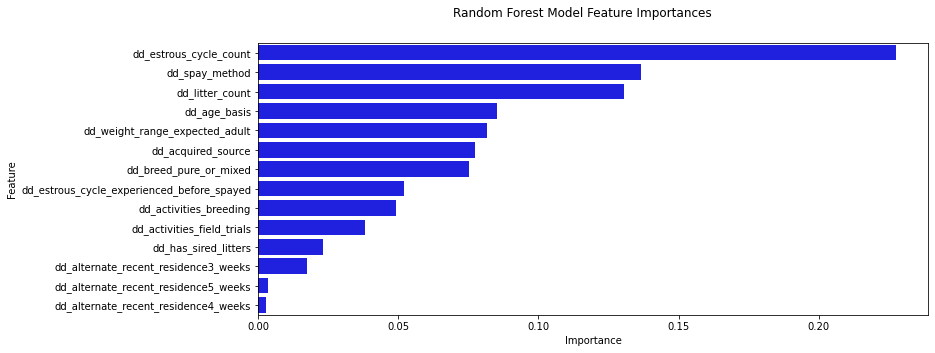

Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.74      0.60      0.66      5054
           2       0.30      0.46      0.37      1946

    accuracy                           0.56      7000
   macro avg       0.52      0.53      0.51      7000
weighted avg       0.62      0.56      0.58      7000

Random Forest Confusion Matrix: [[3008 2046]
 [1051  895]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 864x360 with 0 Axes>

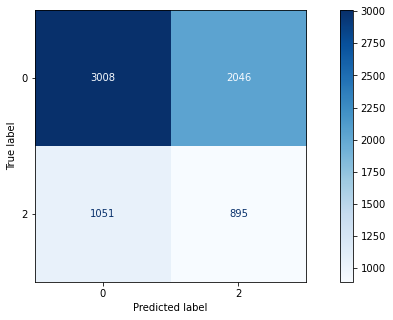

Dummy Confusion Matrix: [[5054    0]
 [1946    0]]
Dummy Classification Report:               precision    recall  f1-score   support

           0       0.72      1.00      0.84      5054
           2       0.00      0.00      0.00      1946

    accuracy                           0.72      7000
   macro avg       0.36      0.50      0.42      7000
weighted avg       0.52      0.72      0.61      7000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

<Figure size 864x360 with 0 Axes>

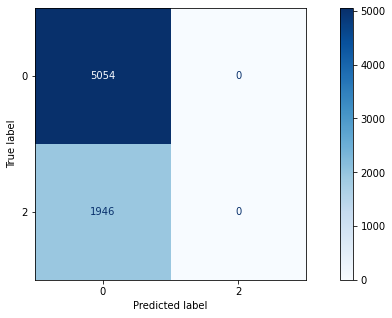

hs_health_conditions_oral
-----Regression Analysis-----
0 dd_alternate_recent_residence4_weeks  -  -0.4276179870598791
1 dd_alternate_recent_residence5_weeks  -  -0.4082482904638629
2 dd_birth_year  -  -0.3712529022793377
3 dd_age_years  -  0.37033460206169166
4 dd_acquired_year  -  -0.3097662676780802
--------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

dd_alternate_recent_residence4_weeks = 0.00025848287425480227
dd_alternate_recent_residence5_weeks = 0.0001286925212085565
dd_birth_year = 0.11974318544912094
dd_age_years = 0.49521895190809107
dd_acquired_year = 0.17318239161720042
dd_acquired_source = 0.020407639260717855
dd_breed_pure_or_mixed = 0.02960716211852515
dd_has_sired_litters = 0.01238840300893525
dd_estrous_cycle_count = 0.03233345811820344
dd_age_basis = 0.023595898894223814
dd_litter_count = 0.015942747801708065
dd_estrous_cycle_experienced_before_spayed = 0.01998857291731125
dd_spay_method = 0.05530196461542163
dd_alternate_recent_residence3_weeks = 0.0019024488950778956


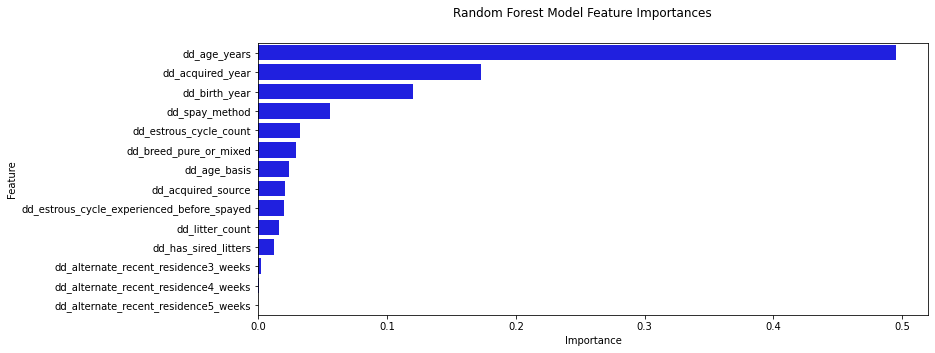

Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.79      0.75      0.77      5126
           2       0.40      0.45      0.42      1853

    accuracy                           0.67      6979
   macro avg       0.59      0.60      0.60      6979
weighted avg       0.69      0.67      0.68      6979

Random Forest Confusion Matrix: [[3870 1256]
 [1028  825]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 864x360 with 0 Axes>

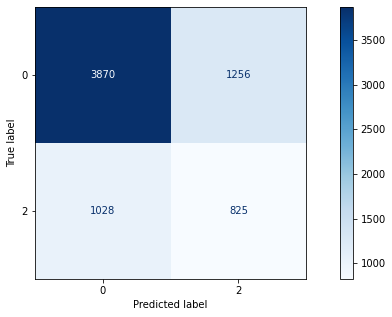

Dummy Confusion Matrix: [[5126    0]
 [1853    0]]
Dummy Classification Report:               precision    recall  f1-score   support

           0       0.73      1.00      0.85      5126
           2       0.00      0.00      0.00      1853

    accuracy                           0.73      6979
   macro avg       0.37      0.50      0.42      6979
weighted avg       0.54      0.73      0.62      6979



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

<Figure size 864x360 with 0 Axes>

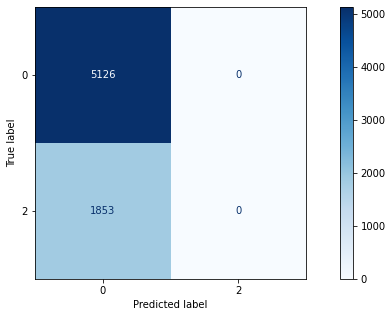

hs_health_conditions_trauma
-----Regression Analysis-----
0 dd_alternate_recent_residence5_weeks  -  -0.6666666666666665
1 dd_alternate_recent_residence4_weeks  -  -0.34641016151377557
2 dd_alternate_recent_residence3_weeks  -  0.3348068201326658
3 dd_activities_search_and_rescue  -  -0.17131956031734213
4 dd_birth_year  -  -0.14781490111902934
--------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

dd_alternate_recent_residence5_weeks = 0.0005829637050772471
dd_alternate_recent_residence4_weeks = 0.0010640894004727503
dd_alternate_recent_residence3_weeks = 0.007541859126551557
dd_activities_search_and_rescue = 0.018341008116185095
dd_birth_year = 0.5355330902148154
dd_acquired_source = 0.04212491749559954
dd_breed_pure_or_mixed = 0.0403045203866078
dd_has_sired_litters = 0.017528072295013027
dd_estrous_cycle_count = 0.11251837240916032
dd_age_basis = 0.04175416155526766
dd_litter_count = 0.05362170325751436
dd_estrous_cycle_experienced_before_spayed = 0.035734130761188386
dd_spay_method = 0.09335111127654691


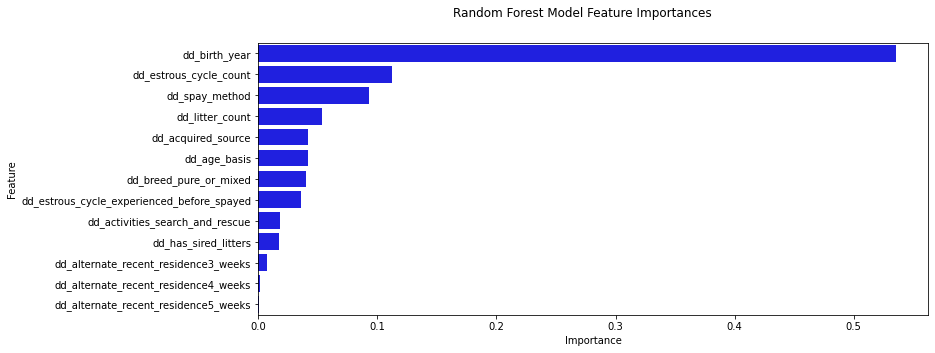

Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.77      0.50      0.61      5092
           2       0.31      0.60      0.41      1908

    accuracy                           0.53      7000
   macro avg       0.54      0.55      0.51      7000
weighted avg       0.65      0.53      0.56      7000

Random Forest Confusion Matrix: [[2569 2523]
 [ 757 1151]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 864x360 with 0 Axes>

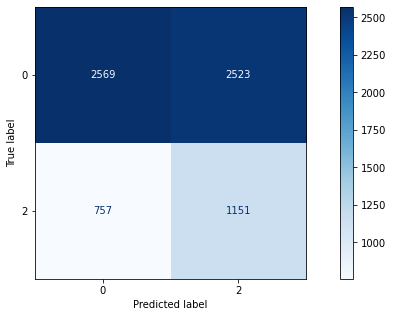

Dummy Confusion Matrix: [[5092    0]
 [1908    0]]
Dummy Classification Report:               precision    recall  f1-score   support

           0       0.73      1.00      0.84      5092
           2       0.00      0.00      0.00      1908

    accuracy                           0.73      7000
   macro avg       0.36      0.50      0.42      7000
weighted avg       0.53      0.73      0.61      7000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

<Figure size 864x360 with 0 Axes>

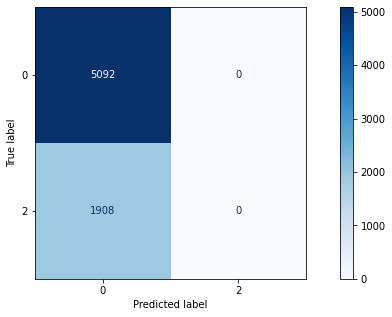

In [46]:
tests = ['hs_health_conditions_infectious_disease','hs_health_conditions_oral','hs_health_conditions_trauma']
for test in tests:
  print(test)
  column_vals = []
  coefficients = []
  test_df = ownr_df[ownr_df['dd_acquired_source'].isin([1,2])]
  test_df = test_df[test_df[test].isin([0,2])]
  test_df_corr = test_df.corr().sort_values(by=[test], ascending=False)
  test_df_corr = test_df_corr.filter(like='dd_', axis=0)
  test_df_corr = test_df_corr[[test]]
  test_df_corr.reset_index(inplace=True)
  test_df_corr = test_df_corr.rename(columns = {'index':'variable'})
  test_df_corr.sort_values(by=test, key=abs, inplace=True, ascending=False)
  test_variable_list = []
  print("-----Regression Analysis-----")
  for row in range(len(test_df_corr.head(5))):
    print(row, test_df_corr.iloc[row,0]," - ", test_df_corr.iloc[row, 1])
    test_variable_list.append(test_df_corr.iloc[row,0])
  print("--------------------------------")
  RF_clf = RandomForestClassifier(n_estimators=300, class_weight = "balanced", random_state=0)
  RF_df = ownr_df[test_variable_list]
  for column in source_test_df_corr['variable'].tolist()[:10]:
    RF_df[column] = ownr_df[column]
  RF_df['dd_acquired_source'] = ownr_df['dd_acquired_source']
  RF_df['test'] = ownr_df[test]
  RF_df = RF_df[RF_df['test'].isin([0,2])]
  RF_df = RF_df[RF_df['dd_acquired_source'].isin([1,2])]
  RF_df = RF_df.fillna(0)
  X = RF_df.drop(['test'], axis=1)
  y = RF_df['test']
  X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=0)
  RF_clf.fit(X_train, y_train)
  dummy = DummyClassifier(strategy="constant", random_state=0, constant=0).fit(X_train, y_train)
  RF_preds = RF_clf.predict(X_test)
  dummy_preds = dummy.predict(X_test)
  for name, importance in zip(X.columns, RF_clf.feature_importances_):
    print(name, "=", importance)
  feature_importance_df = pd.DataFrame(({"Feature": X.columns.tolist(),"Importance": RF_clf.feature_importances_}))
  feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
  plt.figure()
  feature_importance_plot = sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'],color='b')
  plt.suptitle('Random Forest Model Feature Importances')
  plt.show()
  print("Random Forest Classification Report:", classification_report(y_test,RF_preds))
  print("Random Forest Confusion Matrix:", confusion_matrix(y_test, RF_preds))
  plt.figure()
  plot_confusion_matrix(RF_clf, X_test, y_test, cmap = 'Blues')  
  plt.show()
  print("Dummy Confusion Matrix:", confusion_matrix(y_test,dummy_preds))
  print("Dummy Classification Report:", classification_report(y_test, dummy_preds))
  plt.figure()
  plot_confusion_matrix(dummy, X_test, y_test, cmap = 'Blues')  
  plt.show()